In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
credits = pd.read_csv('credit_train.csv.zip', compression='zip', sep=';', encoding='cp1251', decimal=',')

In [83]:
credits[pd.isnull(credits['monthly_income'])].head(10)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
19639,19640,F,33,MAR,BIS,13009.0,10,1.6,0.535834,SCH,ПРИМОРСКИЙ КРАЙ,NaN,2.0,0.0,0


In [33]:
credits['living_region'].value_counts()

ОБЛ МОСКОВСКАЯ                              12228
КРАСНОДАРСКИЙ КРАЙ                           7457
САНКТ-ПЕТЕРБУРГ                              5632
МОСКВА                                       5529
ТАТАРСТАН РЕСП                               5187
РЕСП БАШКОРТОСТАН                            4833
ОБЛ ИРКУТСКАЯ                                4080
СВЕРДЛОВСКАЯ ОБЛ                             4006
МОСКВА Г                                     3647
ОБЛ НИЖЕГОРОДСКАЯ                            3555
ОБЛ ЛЕНИНГРАДСКАЯ                            3229
РОСТОВСКАЯ ОБЛ                               3026
КРАСНОЯРСКИЙ КРАЙ                            2929
ЧЕЛЯБИНСКАЯ ОБЛ                              2904
ОБЛ САМАРСКАЯ                                2842
ОБЛ КЕМЕРОВСКАЯ                              2828
ПЕРМСКИЙ КРАЙ                                2716
САНКТ-ПЕТЕРБУРГ Г                            2633
КРАЙ СТАВРОПОЛЬСКИЙ                          2624
ОБЛ АСТРАХАНСКАЯ                             2520


In [6]:
credits['overdue_credit_count'].value_counts()

0.0    154135
1.0      7326
2.0        50
3.0         5
Name: overdue_credit_count, dtype: int64

In [7]:
credits['credit_count'].value_counts()

1.0     45279
2.0     36998
0.0     25806
3.0     23918
4.0     14113
5.0      7543
6.0      3915
7.0      1962
8.0      1007
9.0       476
10.0      220
11.0      129
12.0       74
13.0       33
14.0       15
15.0       13
17.0        5
16.0        4
19.0        3
18.0        2
21.0        1
Name: credit_count, dtype: int64

In [9]:
credits.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

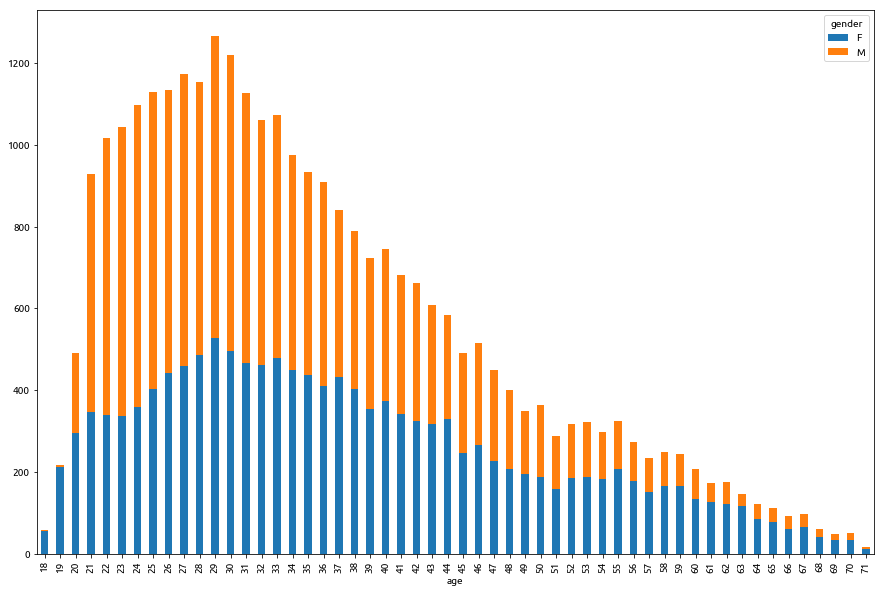

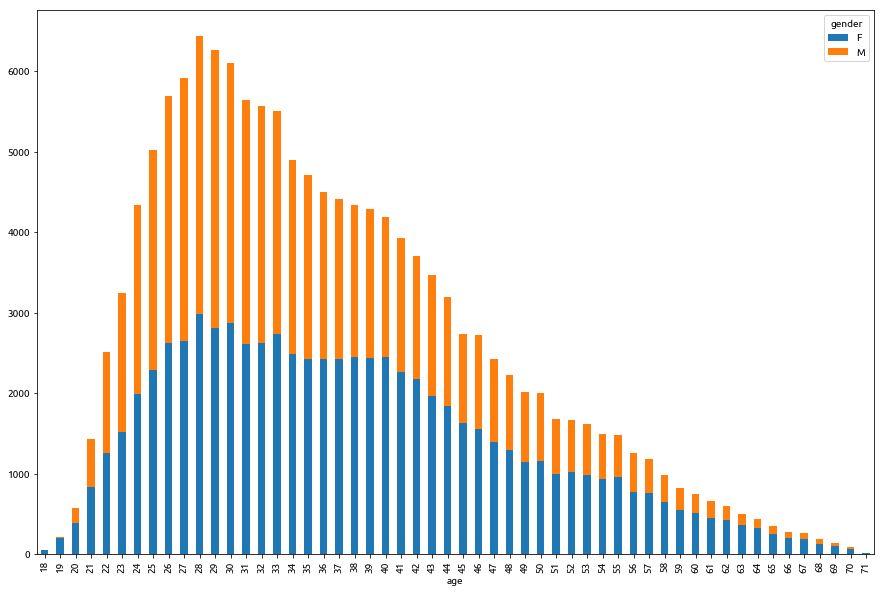

In [55]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'gender']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)
credits[credits['open_account_flg'] == 0].groupby(['age', 'gender']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

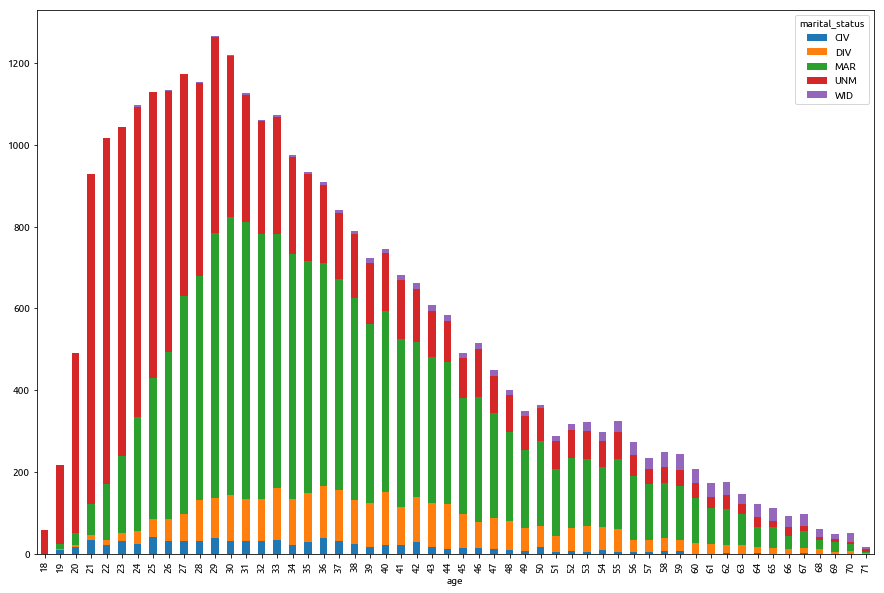

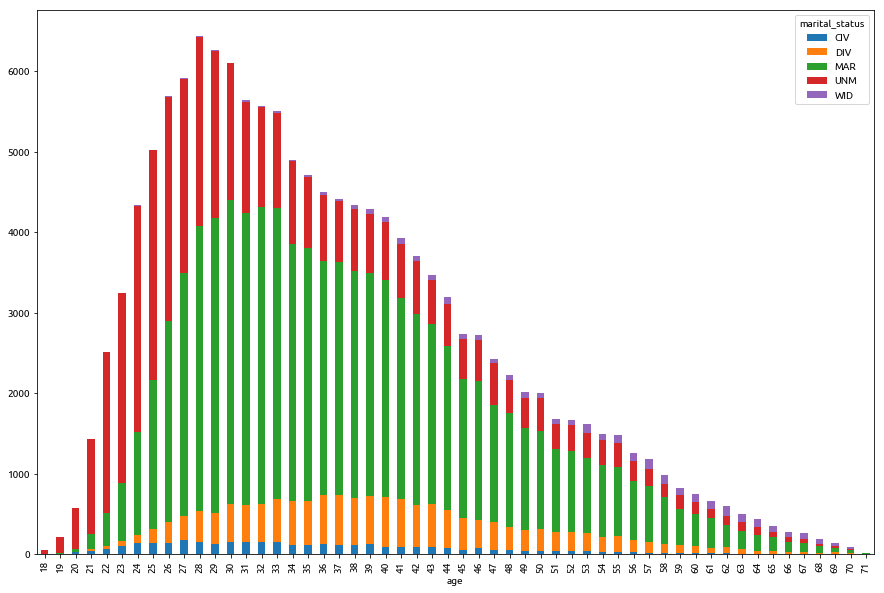

In [56]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'marital_status']).size().unstack().plot(figsize=(15, 10), stacked=True, kind='bar')
credits[credits['open_account_flg'] == 0].groupby(['age', 'marital_status']).size().unstack().plot(figsize=(15, 10), stacked=True, kind='bar')

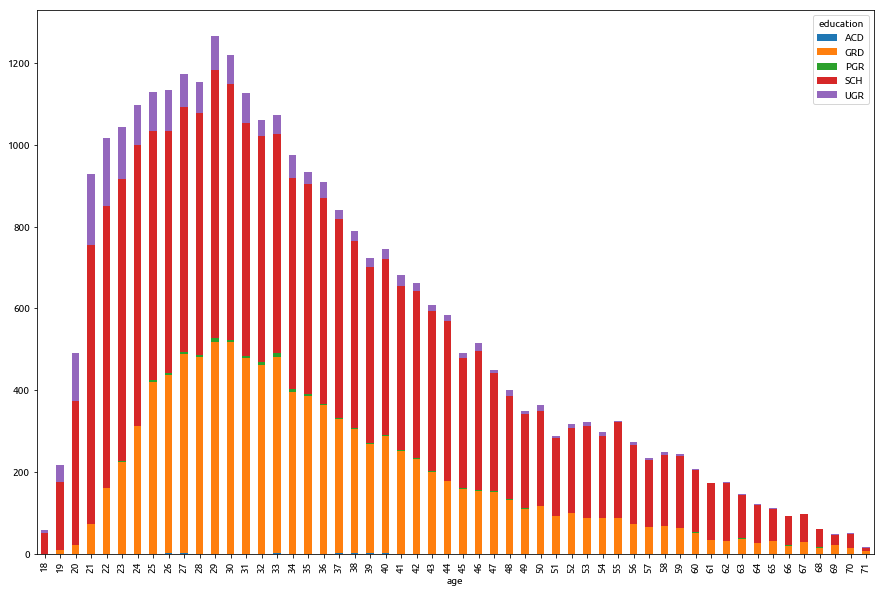

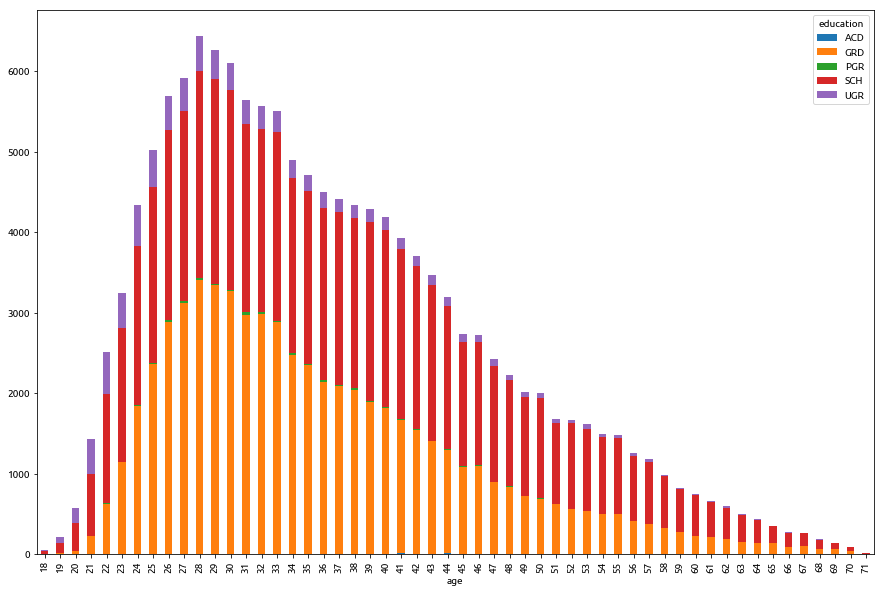

In [57]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'education']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)
credits[credits['open_account_flg'] == 0].groupby(['age', 'education']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

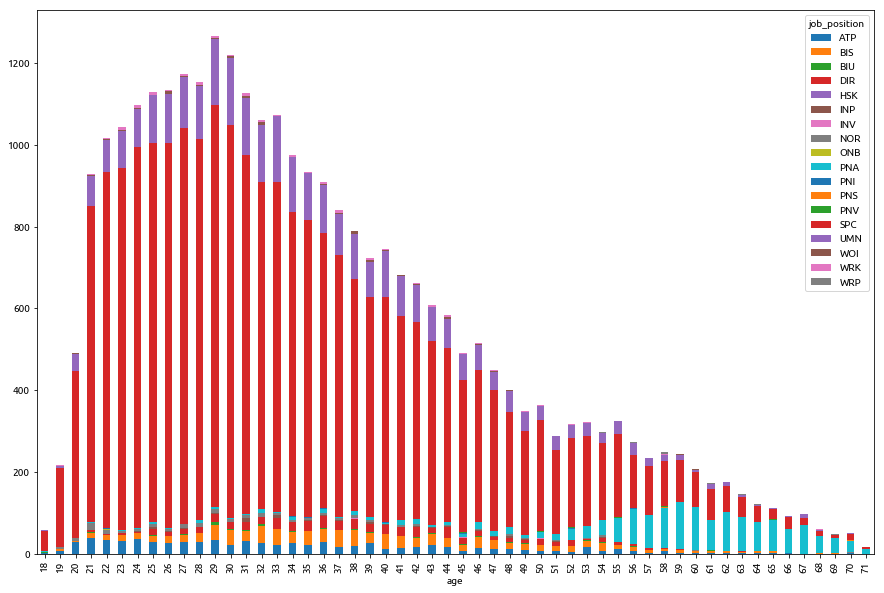

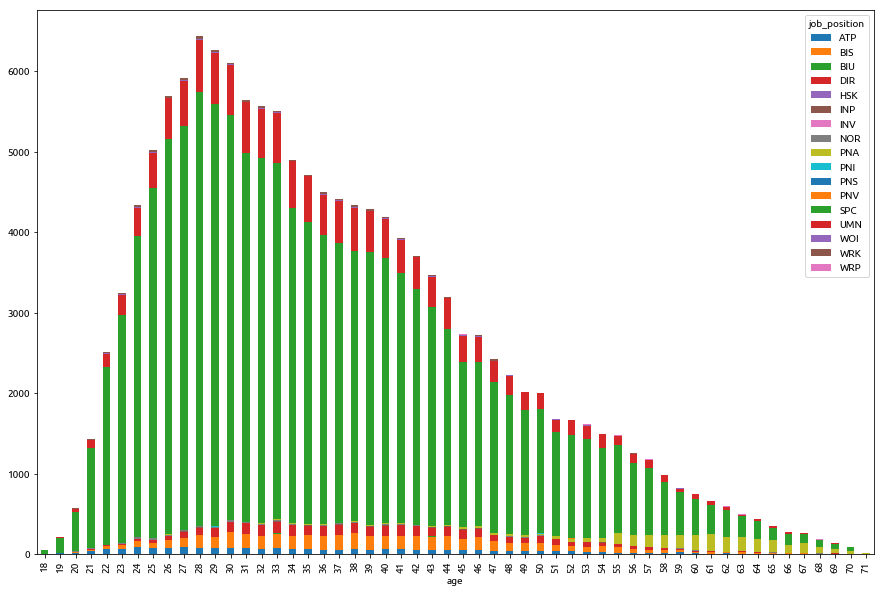

In [58]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'job_position']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)
credits[credits['open_account_flg'] == 0].groupby(['age', 'job_position']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

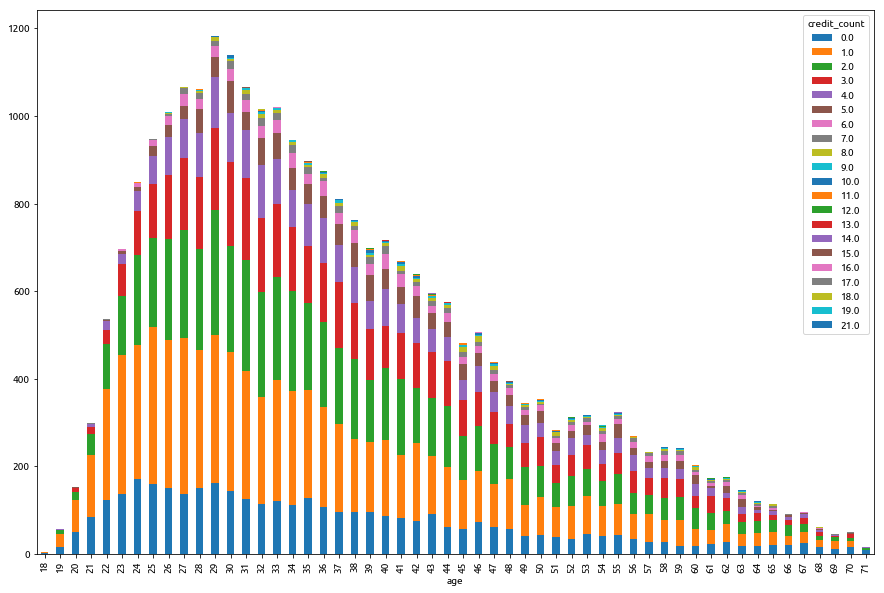

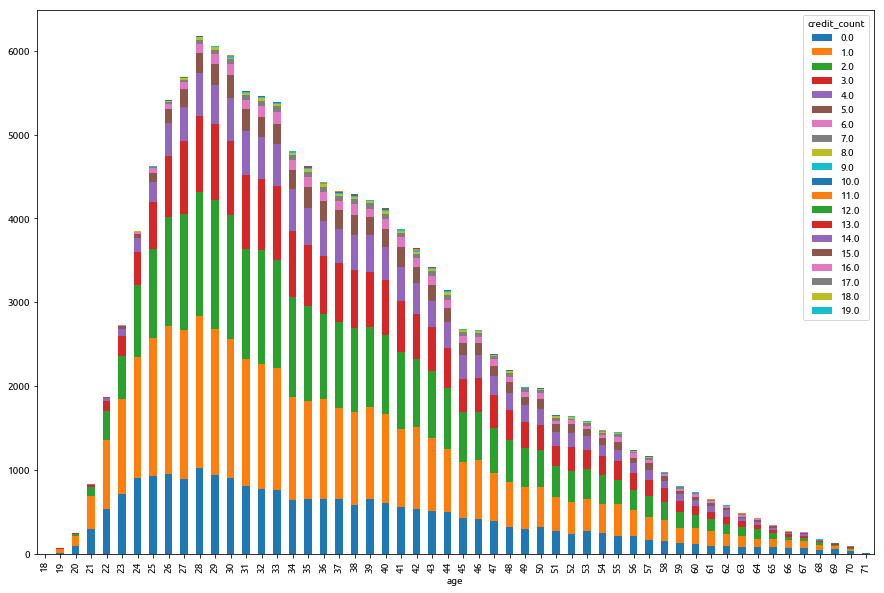

In [61]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'credit_count']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked =True)
credits[credits['open_account_flg'] == 0].groupby(['age', 'credit_count']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked =True)

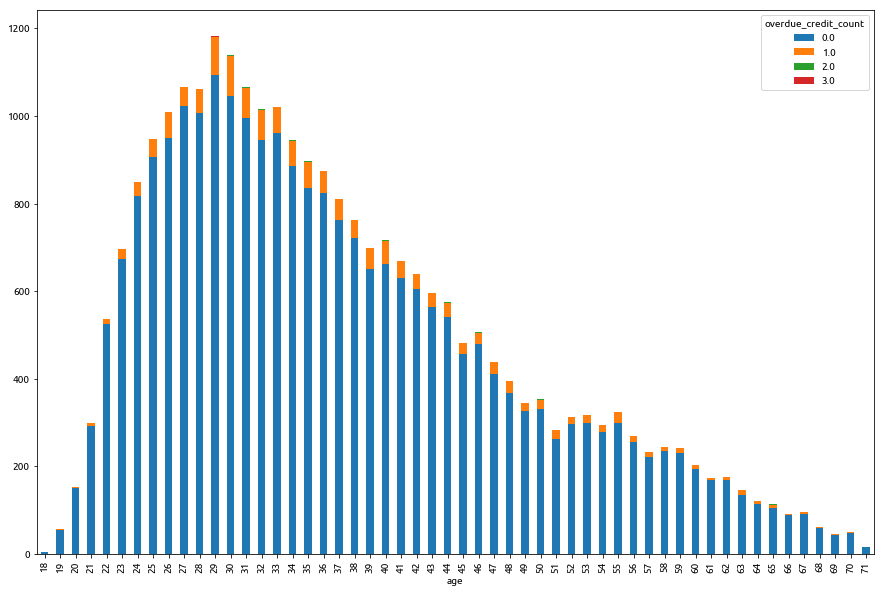

In [43]:
credits[credits['open_account_flg'] == 1].groupby(['age', 'overdue_credit_count']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

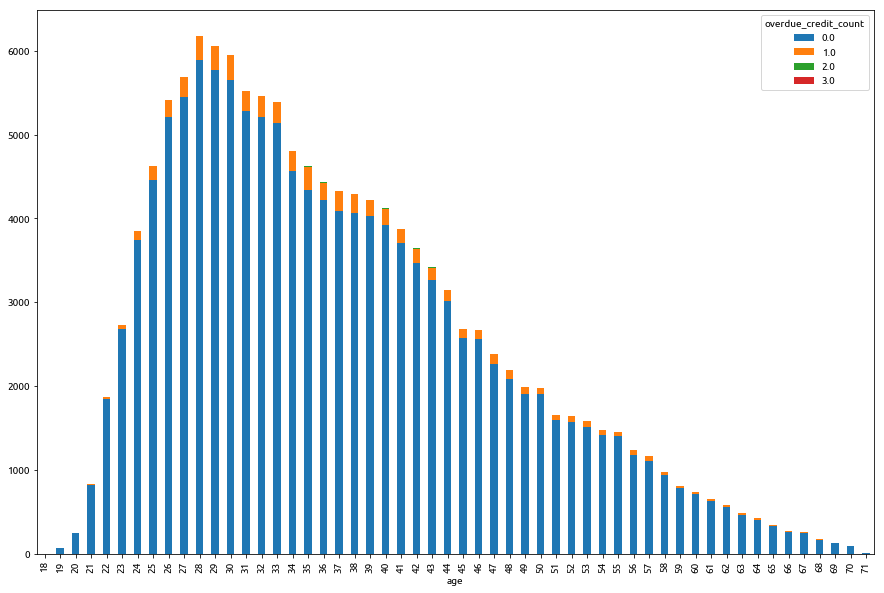

In [67]:
credits[credits['open_account_flg'] == 0].groupby(['age', 'overdue_credit_count']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

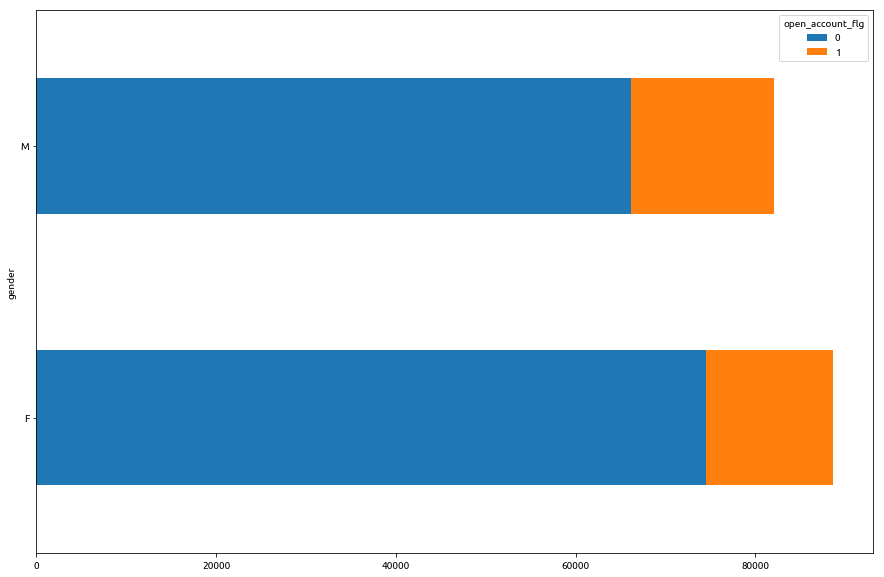

In [43]:
credits.groupby(['gender', 'open_account_flg']).size().unstack().plot(kind='barh', figsize=(15, 10), stacked=True)

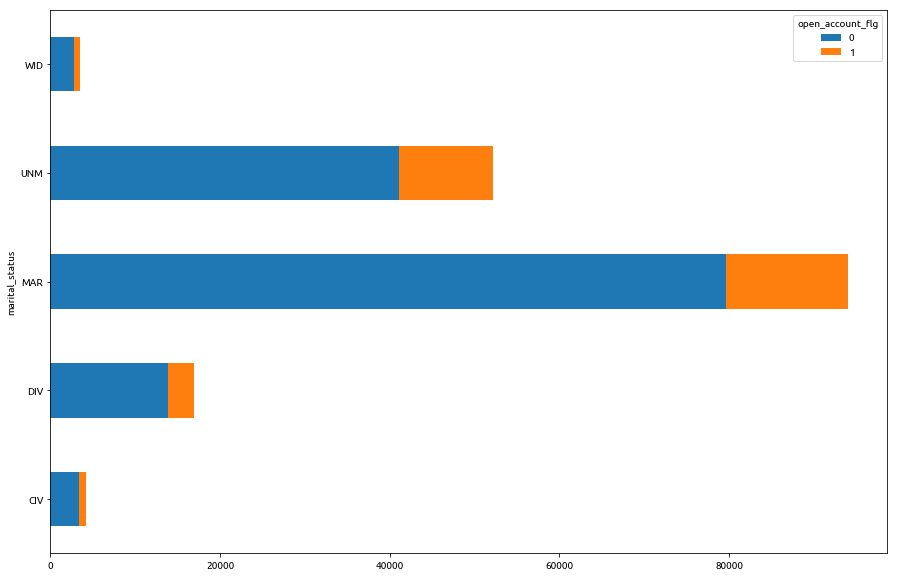

In [44]:
credits.groupby(['marital_status', 'open_account_flg']).size().unstack().plot(kind='barh', figsize=(15, 10), stacked=True)

0    14334
1     3340
Name: open_account_flg, dtype: int64

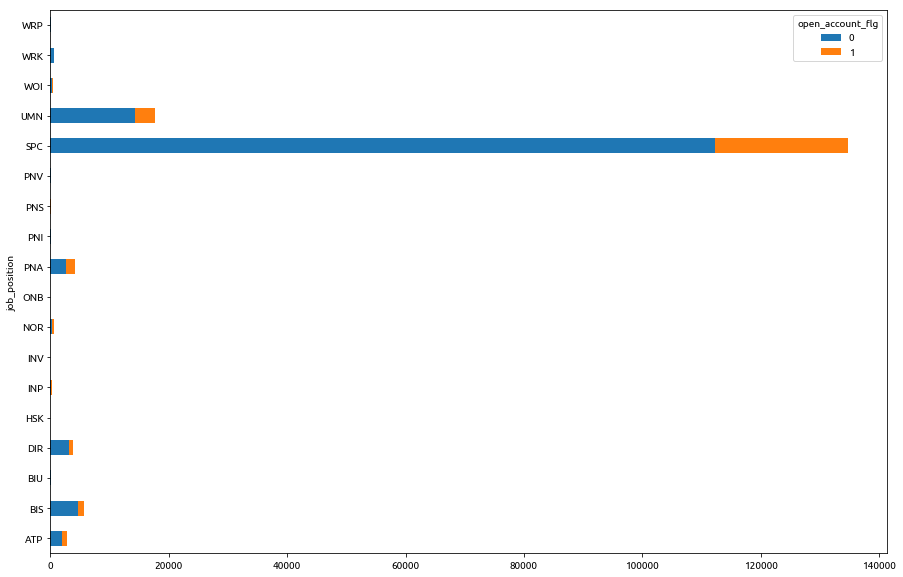

In [71]:
credits.groupby(['job_position', 'open_account_flg']).size().unstack().plot(kind='barh', figsize=(15, 10), stacked=True)
credits[credits['job_position']=='UMN']['open_account_flg'].value_counts()

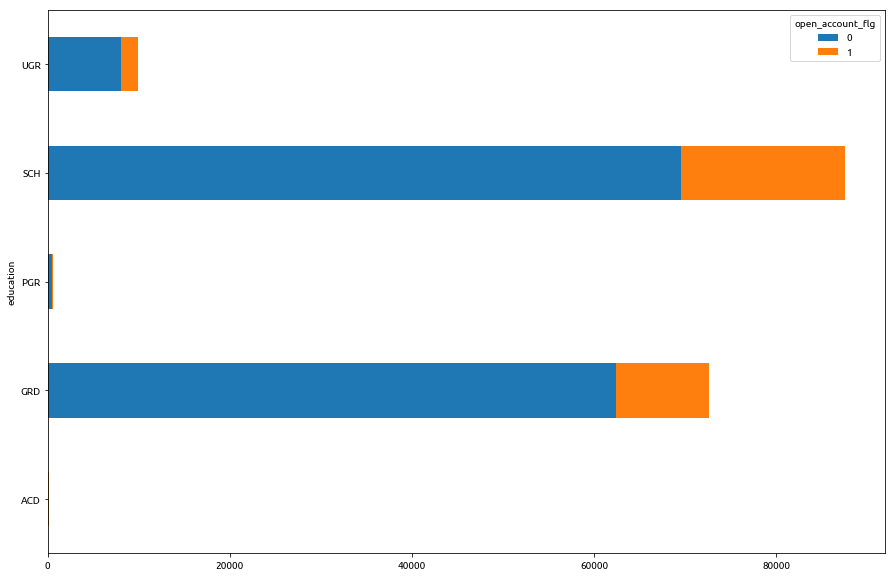

In [46]:
credits.groupby(['education', 'open_account_flg']).size().unstack().plot(kind='barh', figsize=(15, 10), stacked=True)

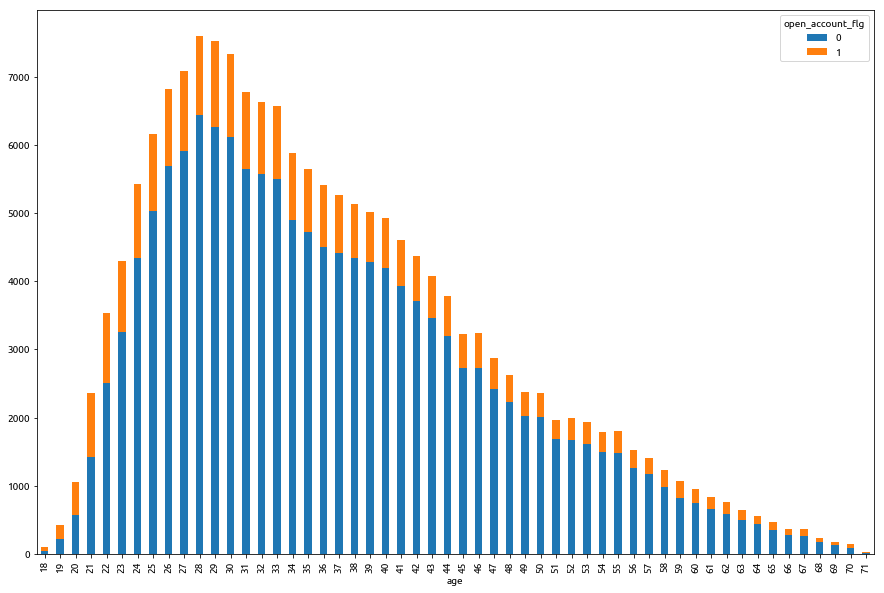

In [45]:
credits.groupby(['age', 'open_account_flg']).size().unstack().plot(kind='bar', figsize=(15, 10), stacked=True)

In [82]:
credits[credits['monthly_income']>200000]['open_account_flg'].value_counts()

0    233
1     38
Name: open_account_flg, dtype: int64

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [33]:
model = KMeans(n_clusters=5)

In [34]:
data = credits[['age', 'credit_sum']].fillna(0)

In [35]:
data[['age', 'credit_sum']] = scale(data[['age', 'credit_sum']].as_matrix())

In [36]:
model = model.fit(data.as_matrix())

In [37]:
print(model.labels_)

[2 1 1 ..., 1 3 3]


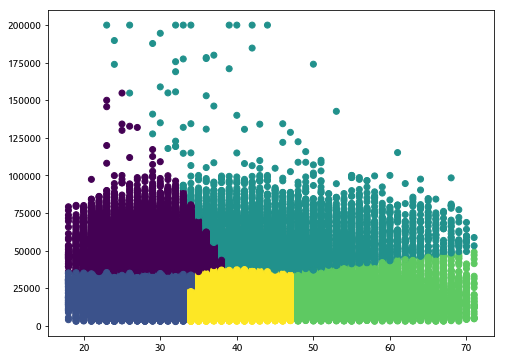

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(credits['age'], credits['credit_sum'], c=model.labels_.astype(np.float))
plt.show()

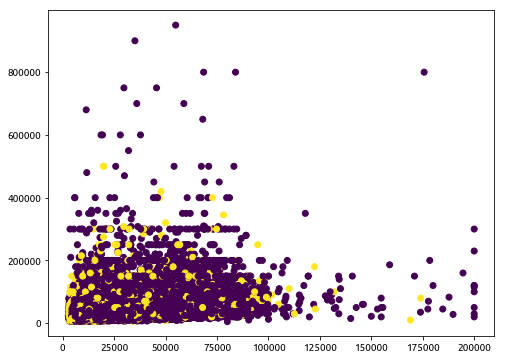

In [46]:
plt.figure(figsize=(8,6))
plt.scatter( credits['credit_sum'], credits['monthly_income'], c=credits['open_account_flg'].astype(np.float))
plt.show()

In [40]:
credits['open_account_flg'].value_counts()

0    140690
1     30056
Name: open_account_flg, dtype: int64

In [62]:
credits['proportion'] = credits[credits['open_account_flg'] == 1].groupby(['age']).size() / credits[credits['open_account_flg'] == 0].groupby(['age']).size()

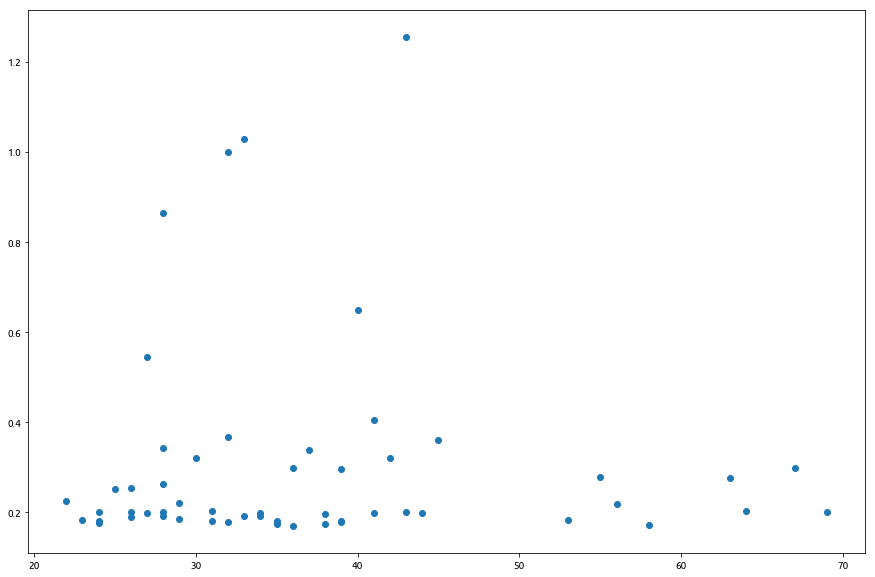

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(credits['age'], credits['proportion'])
plt.show()

In [65]:
credits.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg', 'proportion'],
      dtype='object')

In [66]:
from sklearn import preprocessing

In [77]:
np.unique(credits['education']).size

5

In [80]:
# gender encoder
gender = pd.get_dummies(credits['gender'])
# marital status
marital = pd.get_dummies(credits[['marital_status']])
# job encoding
job = pd.get_dummies(credits[['job_position']])
# tariff encoding
tar = pd.get_dummies(credits[['tariff_id']])
# education encoding
edu = pd.get_dummies(credits[['education']])

In [86]:
train = pd.concat([credits['age'], credits['credit_sum'], credits['credit_month'], credits['score_shk'], credits['monthly_income'], credits['credit_count'], credits['overdue_credit_count'] , gender, marital, job, tar, edu], axis=1)

In [97]:
train = train.fillna(0)

In [98]:
from sklearn import cross_validation

In [99]:
X_train, X_test, y_train, _y_test = cross_validation.train_test_split(train, credits['open_account_flg'], test_size=0.4, random_state=37)

In [100]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)